In [1]:
import pytorch_lightning as pl
from model import SegmentationModel, SigspatialDataset
from pathlib import Path
import os
import torch
import utils
import matplotlib.pyplot as plt

BASE_DIR = utils.BASE_DIR
LOGS_DIR = "/data1/malto/sigspatial/logs"
last_version = max([int(s.replace("version_", "")) for s in os.listdir(f"{LOGS_DIR}/lightning_logs")])

checkpoint_folder = Path(f"{LOGS_DIR}/lightning_logs/version_{last_version}/checkpoints")
filenames = [name for name in os.listdir(checkpoint_folder) if name.split(".")[-1] == "ckpt"]

model = SegmentationModel.load_from_checkpoint(checkpoint_folder / filenames[0])
im_num = 7


In [2]:
ds = SigspatialDataset()

In [3]:
for x, y in ds:
    if torch.argmax(y, dim=0).max() != 0:
    #if y.max() != 0:
        break
x.shape, y.shape

(torch.Size([3, 2048, 2048]), torch.Size([2, 2048, 2048]))

In [4]:
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device=device).unsqueeze(dim=0)
pred = model(x)

/data1/malto/fborra/venv/lib/python3.9/site-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


In [5]:
pred = pred.squeeze(dim=0)
pred

tensor([[[0.9925, 0.9923, 0.9921,  ..., 0.9919, 0.9927, 0.9935],
         [0.9923, 0.9925, 0.9926,  ..., 0.9917, 0.9920, 0.9923],
         [0.9921, 0.9926, 0.9931,  ..., 0.9916, 0.9913, 0.9910],
         ...,
         [0.9963, 0.9961, 0.9959,  ..., 0.9954, 0.9949, 0.9944],
         [0.9966, 0.9963, 0.9959,  ..., 0.9947, 0.9944, 0.9940],
         [0.9968, 0.9964, 0.9960,  ..., 0.9939, 0.9937, 0.9935]],

        [[0.0075, 0.0077, 0.0079,  ..., 0.0081, 0.0073, 0.0065],
         [0.0077, 0.0075, 0.0074,  ..., 0.0083, 0.0080, 0.0077],
         [0.0079, 0.0074, 0.0069,  ..., 0.0084, 0.0087, 0.0090],
         ...,
         [0.0037, 0.0039, 0.0041,  ..., 0.0046, 0.0051, 0.0056],
         [0.0034, 0.0037, 0.0041,  ..., 0.0053, 0.0056, 0.0060],
         [0.0032, 0.0036, 0.0040,  ..., 0.0061, 0.0063, 0.0065]]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [6]:
pred = torch.argmax(pred, dim=0)
y = torch.argmax(y, dim=0)
pred.shape, y.shape

(torch.Size([2048, 2048]), torch.Size([2048, 2048]))

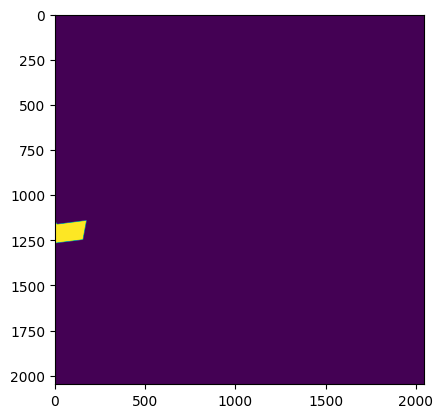

In [7]:
plt.imshow(y.squeeze(dim=0))

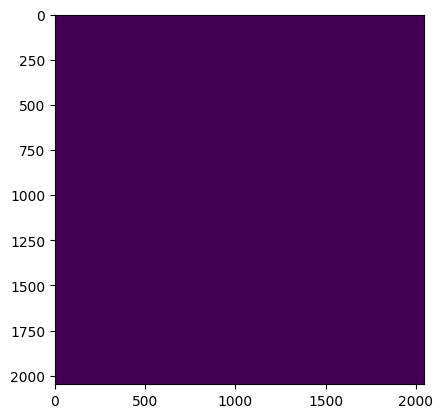

In [8]:
plt.imshow(pred.to(device='cpu').squeeze(dim=0).detach().numpy())